![image](competi.png)

#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score,mean_squared_error
import urllib.request
from PIL import Image
from xgboost import XGBClassifier

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("diamonds_train.csv", index_col=0)

In [3]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708
40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619
40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267
40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965


In [7]:
lb_make = LabelEncoder()
df['cut'] = lb_make.fit_transform(df['cut'])
df['color'] = lb_make.fit_transform(df['color'])
df['clarity'] = lb_make.fit_transform(df['clarity'])

In [11]:
X = np.array(df[["carat", "color", "clarity", "x","y","z"]]) #without cut, depth
y = np.array(df["price"])

In [42]:
X, y = make_regression(n_features=6, n_informative=2,
                       random_state=0, shuffle=False)

In [12]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=42)

In [67]:
pipelines = []
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
#pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor(
pipelines.append(('ScaledFOR', Pipeline([('Scaler', StandardScaler()),('FOR', RandomForestRegressor(max_depth=6, random_state=0, n_estimators=1000))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=2)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="neg_mean_absolute_error")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLASSO: -1.230501 (0.106742)
ScaledKNN: -29.180551 (1.944607)
ScaledCART: -24.973068 (1.691026)
ScaledFOR: -21.175664 (2.143945)


In [68]:
RandomForestRegModel = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=1000)
RandomForestRegModel.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=1000, random_state=0)

In [69]:
y_pred = RandomForestRegModel.predict(X)
y_pred

array([104.7105929 ,  16.18332147,  35.69672191, ...,  60.28769597,
        81.54124518,  52.7811812 ])

In [71]:
mean_absolute_error(Y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [20, 40345]

In [11]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'price').index
columns

Index(['price', 'carat', 'x', 'z', 'y', 'color', 'table', 'cut', 'depth',
       'clarity'],
      dtype='object')

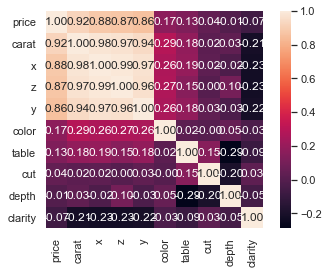

In [12]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [13]:
df['price'] = np.log(df['price'])
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,2,4,5,63.0,57.0,6.73,6.70,4.23,8.72
1,0.28,4,0,7,64.0,56.0,4.14,4.17,2.66,6.28
2,0.42,3,2,4,61.2,58.0,4.86,4.82,2.96,7.01
3,0.26,2,4,1,61.1,57.0,4.16,4.12,2.53,6.40
4,1.10,1,3,2,63.4,57.0,6.52,6.55,4.14,8.52
...,...,...,...,...,...,...,...,...,...,...
40340,1.55,3,4,5,61.3,61.0,7.46,7.39,4.55,9.37
40341,0.36,2,0,2,60.6,56.0,4.58,4.63,2.79,6.43
40342,0.57,4,5,5,62.2,55.0,5.33,5.34,3.32,7.14
40343,1.01,4,2,1,59.6,62.0,6.47,6.56,3.88,9.21


**Importante:**

   - Si quitas columnas o creas columnas nuevas a partir de otras, o cualquier modificación column-wise tendrás que aplicarlo al dataset de `diamonds_test.csv` de cara a hacer la predicción.
   - Si por lo contrario, decides por ejemplo, quitar los outliers o hacer un `dropna()`, o cualquier modificación row-wise eso NO PODRÁS (ni debes) aplicarlo al dataset de `diamonds_test.csv` de cara a hacer la predicción. ¿Por qué? Porque si el conjunto de test tiene 50 observaciones (filas) la predicción se espera que tenga 50 filas.

#### ¿Y si lo que hago es estandarizar los datos o hacer un encoding, también se lo tengo que hacer al test antes de predecir?

In [ ]:
# ¿qué opináis?
#Sí, habría que hacerlo

-----------------------------------------------------------------------------------------------------------------

### Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

(40345, 6)

In [75]:
y.shape

(40345,)

#### ¿Y si después del análisis exploratorio de mis datos llego a la conclusión de que puedo predecir el precio solo con las columnas `x`, `y` y `z`, también aplica al test?

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# ¿qué opináis?
# sí, el conjunto para predecir `diamonds_test.csv` también tendrá que tener 3 columnas

In [102]:
train_data = X_train
train_label = y_train
test_dataX = X_test
test_datay = y_test


train_pool = Pool(train_data, 
                  train_label,
                  )
test_pool = Pool(test_dataX,
                 test_datay)

In [103]:
model = CatBoostRegressor(depth=6, iterations=100,
                          learning_rate=0.2,
                          l2_leaf_reg=3,
                          loss_function='RMSE')   #bootstrap_type=Poisson, Bayesian, Bernoulli, MVS

In [104]:
model.fit(train_pool)

0:	learn: 3297.9260486	total: 7.44ms	remaining: 737ms
1:	learn: 2735.6033486	total: 12.4ms	remaining: 610ms
2:	learn: 2300.7203608	total: 16.8ms	remaining: 544ms
3:	learn: 1961.5449132	total: 22.5ms	remaining: 539ms
4:	learn: 1703.1151325	total: 27.5ms	remaining: 522ms
5:	learn: 1484.4805242	total: 32.1ms	remaining: 504ms
6:	learn: 1322.2915034	total: 37.3ms	remaining: 495ms
7:	learn: 1194.5149848	total: 42.6ms	remaining: 489ms
8:	learn: 1094.9325868	total: 47.5ms	remaining: 480ms
9:	learn: 1020.8052717	total: 53ms	remaining: 477ms
10:	learn: 952.9394163	total: 58.5ms	remaining: 473ms
11:	learn: 903.6390374	total: 63.6ms	remaining: 466ms
12:	learn: 863.5927545	total: 68.6ms	remaining: 459ms
13:	learn: 821.8416675	total: 72.9ms	remaining: 448ms
14:	learn: 794.8111309	total: 77ms	remaining: 436ms
15:	learn: 773.7690407	total: 81.1ms	remaining: 426ms
16:	learn: 748.0523261	total: 86.5ms	remaining: 422ms
17:	learn: 734.0196808	total: 91.3ms	remaining: 416ms
18:	learn: 715.7603360	total: 95

In [105]:
preds = model.predict(test_pool)

In [106]:
np.sqrt(mean_squared_error(test_datay, preds))

572.435331802674

In [107]:
mean_absolute_error(test_datay, preds)

311.40743425153136

In [14]:
#model2 = 

grid = {'learning_rate': [0.15, 0.5],
        'depth': [6, 8],
        'l2_leaf_reg': [1, 3]}

grid_search_result = RandomForestRegModel.grid_search(grid, 
                                       X, 
                                       y, 
                                       plot=True) #cat_features=[1, 2, 3]

AttributeError: 'RandomForestRegressor' object has no attribute 'grid_search'

### 2. Dividir X_train, X_test, y_train, y_test

### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros. 

**Consejo**: Usa GridSearch y vuélvete loca o loco probando modelos e hiperparámetros.

Siempre hay tiempo para una historia:
https://catboost.ai/docs/concepts/python-reference_catboostregressor.html

### 4. Entrenar el modelo con X_train, y_train

### 5. Predecir con el modelo ya entrenado con X_test

In [50]:
predictions = RandomForestRegModel.predict(X)
print(predictions)

[ 9.31908124e+01  4.70164474e+01  4.80009456e+01 -5.38636139e+00
  7.19106923e+01  1.88700424e+01  9.64684070e+01 -6.10786216e+01
 -9.07641480e+01  1.14482455e+01 -4.75944298e+01 -8.70629492e+01
  3.69308296e+01 -1.58773895e+01  1.22882030e+02  4.24057491e+00
  3.47541866e+01 -5.21842883e+01  1.18366229e+02  3.98058663e+00
 -5.14264798e+00  1.03443694e+01 -4.11842638e+01 -4.20997670e+00
  1.35803542e+02  2.96947919e+01  4.98942765e+01  5.20608795e+01
  7.73498332e+01 -4.53066931e+01 -4.96566109e+01 -5.40455409e+01
 -2.66977910e+01  1.19472683e+02 -1.21657526e-01  5.51739717e+01
  1.15975242e+01 -1.45836419e+01 -4.17567769e+01 -4.79572380e+01
 -4.72483266e+01  8.85384576e+01  3.09255407e-02 -8.00854060e+01
 -9.31713604e+01 -1.81850889e+01  2.81083453e+01 -1.39885768e+01
  6.88024357e+01  1.55205868e+01 -4.90986104e+01 -9.89978206e+01
 -7.65552962e+01  4.60854725e+00 -6.57211135e+01  1.54758053e+01
 -9.11561379e+01 -6.51446019e+01  4.27465032e+01 -4.80163329e+01
  4.52523605e+01 -2.11102

### 6. Sacar métricas, valorar el modelo 

Recuerdo que en la competición se va a evaluar con la métrica de RMSE.

In [51]:
np.sqrt(mean_squared_error(y, predictions))

9.474952227950709

In [52]:
mean_absolute_error(y, predictions)

6.495054459781049

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

_Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `diamonds_test.csv` nos arriesgamos a que digamos, no salga lo esperado._

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `diamonds_train.csv` al completo.

**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**

Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `diamonds_test.csv` para predecir.

**¿De dónde saco `diamonds_test.csv`?**

In [21]:
X_pred = pd.read_csv("diamonds_test.csv", index_col = 0)
X_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [22]:
X_pred.shape

(13449, 9)

In [23]:
lb_make = LabelEncoder()
X_pred['cut'] = lb_make.fit_transform(X_pred['cut'])
X_pred['color'] = lb_make.fit_transform(X_pred['color'])
X_pred['clarity'] = lb_make.fit_transform(X_pred['clarity'])

In [24]:
X_pred = np.array(X_pred[["carat", "color", "clarity", "x","y","z"]])

In [54]:
X_pred.shape

(13449, 8)

**¿Por qué da error?** 

In [55]:
predictions_submit = RandomForestRegModel.predict(X_pred)
predictions_submit

ValueError: X has 8 features, but DecisionTreeRegressor is expecting 6 features as input.

In [28]:
predictions_submit.shape

(13449,)

## IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 13449 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `diamonds_test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

**¿Qué más habrá que quitar o hacer?**

In [ ]:
# ¿Qué opináis?
# En este caso, quitar todas las columnas, menos la x, y y z

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

**Truqui**: Carga X que debe estar actualmente actualizada a cómo la usaste para entrenar a `model` y haz que `X_pred` sea igual. ¡Sin quitar filas!

Porque:
    - SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 3 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS

In [99]:
#X_pred

array([[4.41, 4.43, 2.65],
       [4.52, 4.46, 2.79],
       [7.58, 7.55, 4.56],
       ...,
       [7.3 , 7.37, 4.53],
       [7.79, 7.68, 4.66],
       [4.29, 4.34, 2.64]])

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [ ]:
# respuestas

In [47]:
#predictions_submit = model.predict(X_pred)
#predictions_submit

array([   18.68779645,  2500.80852261,  4864.54195375, ...,
        6118.55288359, 13395.34483755,  1887.97613812])

In [48]:
#predictions_submit.shape

(13449,)

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

**¿De dónde saco `sample_submission.csv`?**

In [29]:
sample = pd.read_csv("sample_submission.csv")

In [30]:
sample.head()

,id,price
0,0,12132
1,1,11786
2,2,14684
3,3,15425
4,4,6724


In [31]:
sample.shape

(13449, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [32]:
submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})

In [33]:
submission.head()

,id,price
0,0,427.98
1,1,1823.55
2,2,9617.38
3,3,480.89
4,4,8452.21


In [34]:
submission.shape

(13449, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [37]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [58]:
help(chequeator)

Help on function chequeator in module __main__:

chequeator(df_to_submit)
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.



In [39]:
chequeator(submission)

You're ready to submit!
